### A1 
- Descarga datos mediante la siguiente url https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv
- Imprimir el número de ciudades que tiene el estado de Florida
- Resolver el problema de dos maneras distintas, una usando pandas y otra sin usar ninguna librería (solo Python standard)

In [27]:
import numpy as np
import pandas as pd
import urllib.request
import os
url = 'https://raw.githubusercontent.com/grammakov/USA-cities-and-states/master/us_cities_states_counties.csv'  
ruta = os.path.join("Ciudades.csv")
urllib.request.urlretrieve(url, ruta)

('Ciudades.csv', <http.client.HTTPMessage at 0x22b1d422180>)

In [28]:
ruta = os.path.join("Ciudades.csv")
ciudades=[]
dataset = pd.read_csv(ruta, sep='|', engine='python')
florida=dataset[dataset['State full']=='Florida']['City']
for ciudad in florida:
    if ciudad not in ciudades:
        ciudades.append(ciudad)

print('Nº de ciudades:',len(ciudades))

Nº de ciudades: 537


In [29]:
import csv
with open(ruta) as fichero:
    reader=csv.reader(fichero,delimiter='|')
    ciudades=[]
    for ciudad in reader:
        if ciudad[2]=='Florida' and ciudad[0] not in ciudades:
            ciudades.append(ciudad[0])
    print('Nº de ciudades:',len(ciudades))

Nº de ciudades: 537


### A2 
- Genera una matriz con valores aleatorios de 0 a 100 de dimensiones 16x16
- Calcula los siguentes estadísticos en la matriz anterior, por fila (el resultado de cada uno debe ser un array de dimensiones 16x1)
  - Suma de los elementos de cada fila
  - Media de los elementos de cada fila
  - Valores mínimos de cada fila
  - Valores máximos de cada fila

In [30]:
import numpy as np
import pandas as pd
valores=np.random.randint(101,size=(16,16)).copy()
print(valores)

[[ 10   5  21  49  70  75  65   0  63  76  66  88   8  86  41  65]
 [ 12  52  54  13  59  11  42  96  96  23  22  78  95  38  42  42]
 [ 24  86  86   3  56  47  76   5   9  69  27  70  33  85  80  33]
 [ 80  25  43  21  27   1  69  41  71  18  62   6  41  14  59  83]
 [ 75  60  59  15  63  34   5  53  15   4  20  53  91   2  81  90]
 [ 40  24  62  76  39  38  22  50  37  63  99  12  98  68  97  30]
 [ 57  71  26  54  91  70  43  71  65  51  28  52  72  36  35   8]
 [ 20  13   9  20  87   7  34  79  37  31  89   6  76  90   3  71]
 [ 11  36  11  33   4   8  58  33   4  66  17  14   1  93  12  15]
 [ 78  29  30  75  63  62  14  21  27  46  63  11  29  74  34  66]
 [ 84  14  37  84  64  22  38  63  73   8  66  21   9  97  67  55]
 [ 22  36  18  87  26  61  86  81  78 100  46  89  51  56  43  22]
 [ 20  94  39  42   2  59  23  93  18  25  47  25  39  50  86  16]
 [ 33  56   7  54  65   9   9  39  77  28  49  27  58  88   8  82]
 [ 36   5  20  77  45  47  34  57  40  15  81  25  81  77  71 

In [31]:
np.sum(valores,axis=1)

array([788, 775, 789, 661, 720, 855, 830, 672, 416, 722, 802, 902, 678,
       689, 806, 882])

In [32]:
np.mean(valores,axis=1)

array([49.25  , 48.4375, 49.3125, 41.3125, 45.    , 53.4375, 51.875 ,
       42.    , 26.    , 45.125 , 50.125 , 56.375 , 42.375 , 43.0625,
       50.375 , 55.125 ])

In [33]:
np.max(valores,axis=1)

array([ 88,  96,  86,  83,  91,  99,  91,  90,  93,  78,  97, 100,  94,
        88,  95,  99])

In [34]:
np.min(valores,axis=1)

array([ 0, 11,  3,  1,  2, 12,  8,  3,  1, 11,  8, 18,  2,  7,  5,  5])

#### El broadcasting de numpy consiste y se utiliza en el momento en que se realizan operaciones entre arrays de numpy en las cuales no podamos hacer matematicamente debido a que sus rangos/dimensiones no sean las mismas; 
#### 1º regla:En ese caso lo primero que ocurre es añadir una dimension de 1 al array con menor rango hasta que coincidan.
#### 2º regla:en el caso de que un array tenga un 1 en alguna dimension actua como si tuviese la longitud del array con mayor longitud en esa dimension, lo que supondria que el valor de esta dimension se repetira hasta coincidir con la longitud.
#### 3º regla: si aplicamos las dos primeras reglas, las dimensiones de los arrays deben coincidir, y si no es el caso, la operacion no se puede llevar a cabo

In [35]:
#Ejemplo 1º regla
a=np.arange(5).reshape(1,1,5)
b=np.arange(5)
print(f'{a} shape:{a.shape}')
print(f'{b} shape:{b.shape}')
print(a+b)

[[[0 1 2 3 4]]] shape:(1, 1, 5)
[0 1 2 3 4] shape:(5,)
[[[0 2 4 6 8]]]


In [36]:
# Ejemplo 2º regla
c=np.arange(6).reshape(2,3)
d=np.array([[10],[20]])
print(c)
print(d)
print(c+d)

[[0 1 2]
 [3 4 5]]
[[10]
 [20]]
[[10 11 12]
 [23 24 25]]


- Resolución de dos sistemas de ecuaciones
    - $ A : \begin{cases} -9y +  4x = 20 \\ -7y + 16x = 80                         \end{cases}$
    
    - $ B : \begin{cases} x - 2y + 3z = 7 \\ 2x + y + z = 4 \\ -3x + 2y -2z = -10 \end{cases}$

In [37]:
import numpy.linalg as linalg
A1=np.array([[-9,4],[-7,16]])
A2=np.array([20,80])
y,x=linalg.solve(A1,A2)
print(f'y={str(y)}, x={str(x)}')

y=-0.0, x=5.0


In [38]:
B1=np.array([[1,-2,3],[2,1,1],[-3,2,-2]])
B2=np.array([7,4,-10])
x,y,z=linalg.solve(B1,B2)
print(f'x={str(x)},y={str(y)},z={str(z)}')

x=2.0,y=-0.9999999999999998,z=1.0000000000000002


- Crear un DataFrame de dimensiones 10x10, con números aleatorios en el rango `[0,20]`
- Reemplazar todos aquellos elementos menores de 5 por NaN
- Averiguar cuantos elementos tienen Nan por fila

In [39]:
matriz_10x10=np.random.randint(21,size=(10,10))
matrix=pd.DataFrame(matriz_10x10,columns=list('ABCDEFGHIJ'),index=list('ABCDEFGHIJ')).copy()
display(matrix)

,A,B,C,D,E,F,G,H,I,J
A,6,20,11,15,18,9,16,19,4,18
B,7,0,7,15,7,10,5,8,0,17
C,3,3,9,16,13,3,17,4,1,18
D,9,2,10,12,11,19,7,19,20,4
E,12,4,3,10,0,3,18,8,20,5
F,20,8,18,15,15,9,12,8,9,1
G,1,13,12,19,16,7,13,17,4,19
H,18,14,14,16,11,2,14,7,12,19
I,3,13,5,12,18,15,5,16,5,15
J,0,8,13,11,17,9,16,15,10,0


In [40]:
mask=matrix<5
matrix[mask]=np.nan
display(matrix)

,A,B,C,D,E,F,G,H,I,J
A,6.0,20.0,11.0,15,18.0,9.0,16,19.0,NaN,18.0
B,7.0,NaN,7.0,15,7.0,10.0,5,8.0,NaN,17.0
C,NaN,NaN,9.0,16,13.0,NaN,17,NaN,NaN,18.0
D,9.0,NaN,10.0,12,11.0,19.0,7,19.0,20.0,NaN
E,12.0,NaN,NaN,10,NaN,NaN,18,8.0,20.0,5.0
F,20.0,8.0,18.0,15,15.0,9.0,12,8.0,9.0,NaN
G,NaN,13.0,12.0,19,16.0,7.0,13,17.0,NaN,19.0
H,18.0,14.0,14.0,16,11.0,NaN,14,7.0,12.0,19.0
I,NaN,13.0,5.0,12,18.0,15.0,5,16.0,5.0,15.0
J,NaN,8.0,13.0,11,17.0,9.0,16,15.0,10.0,NaN


In [41]:
print(matrix.isnull().values.sum(axis=1))


[1 2 5 2 4 1 2 1 1 2]


- Se tienen tres datasets, se adjuntan sus datos como diccionarios
  - Students, representa un conjunto de alumnos, con sus nombres, edad y sexo
  - Subjects, un conjunto de asignaturas, con su nombre y el semestre en que se imparten
  - Marks, un conjunto de notas que han obtenido los alumnos en las asignaturas
- Obtener la siguiente información usando Pandas
  - El nombre del alumno con la mejor nota, y en que asignatura ha sido
  - Cuantos alumnos tienen asignaturas suspendidas en el primer semestre
  - La media de edad de los asistentes a la asignatura de Python
  - Formar una palabra con las iniciales de los nombres de los estudiantes ordenados por edad
- Representar graficamente
  - Las notas medias de todos los estudiantes por asignatura, agrupando por sexo
  - La densidad bivariable de la edad de los estudiantes frente a sus notas, agrupando por sexo (mostrando los datos de dispersion en la zona central, las curvas de densidad en los ejes)

In [58]:
students = {'StudentId': [1,2,3,4,5,6], 'Name' : ['Yael','Thomas','Paula','Orlando','Hannah','Nicole'], 'Age' : [22,31,19,44,39,51], 'Sex' : ['M', 'M', 'F', 'M', 'F', 'F']}
subjects = {'SubjectId': [1,2,3], 'Name': ['Python', 'Math', 'DeepLearning'], 'Semester': [1, 1, 2]}
marks = {'StudentId' : [2,2,1,3,6,4,4,3,2,5], 'SubjectId' : [1,3,1,2,1,2,3,1,2,1], 'Mark': [6,5,8,3,5,2,7,2,4,6]}

In [59]:
tabla3=pd.DataFrame(students).merge(pd.DataFrame(marks),on='StudentId',how='left')
tabla4=tabla3.merge(pd.DataFrame(subjects),on='SubjectId',how='left')
display(tabla4)

,StudentId,Name_x,Age,Sex,SubjectId,Mark,Name_y,Semester
0,1,Yael,22,M,1,8,Python,1
1,2,Thomas,31,M,1,6,Python,1
2,2,Thomas,31,M,3,5,DeepLearning,2
3,2,Thomas,31,M,2,4,Math,1
4,3,Paula,19,F,2,3,Math,1
5,3,Paula,19,F,1,2,Python,1
6,4,Orlando,44,M,2,2,Math,1
7,4,Orlando,44,M,3,7,DeepLearning,2
8,5,Hannah,39,F,1,6,Python,1
9,6,Nicole,51,F,1,5,Python,1


In [60]:
for i in range(len(tabla4)):
    if tabla4.iloc[i]['Mark']==np.max(tabla4['Mark']):
        print(f"Nombre Alumno: {tabla4.iloc[i]['Name_x']}, Nombre asignatura:{tabla4.iloc[i]['Name_y']}")

Nombre Alumno: Yael, Nombre asignatura:Python


In [61]:
suspendidos=[]
for i in range(len(tabla4)):
    if tabla4.iloc[i]['Mark']<5 and tabla4.iloc[i]['Semester']==1:
        if tabla4.iloc[i]['StudentId'] not in suspendidos:
            suspendidos.append(tabla4.iloc[i]['StudentId'])
print(f'Alumnos suspendidos:{len(suspendidos)}')

Alumnos suspendidos:3


In [62]:
age=[]
for i in range(len(tabla4)):
    if tabla4.iloc[i]['Name_y']=='Python':
        subjectid=(tabla4.iloc[i]['SubjectId'])

for t in range(len(tabla4)):
    if tabla4.iloc[t]['SubjectId']==subjectid:
        age.append(tabla4.iloc[t]['Age'])
print(f'Media de edad de los alumnos de Python:{np.mean(age)}')

Media de edad de los alumnos de Python:32.4


In [63]:
palabra=[]
estudiantes=pd.DataFrame(students).sort_values(by=['Age'])
for i in range(len(estudiantes)):
    palabra.append(estudiantes.iloc[i]['Name'][0])
    
print(''.join(palabra))

PYTHON


In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Name_y', ylabel='Mark'>

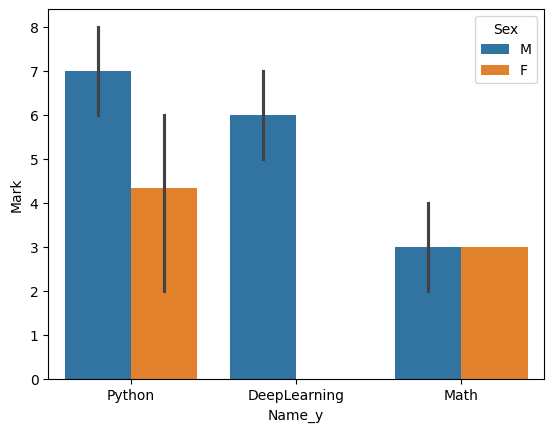

In [65]:
sns.barplot(x='Name_y', y='Mark', hue='Sex', data=tabla4)

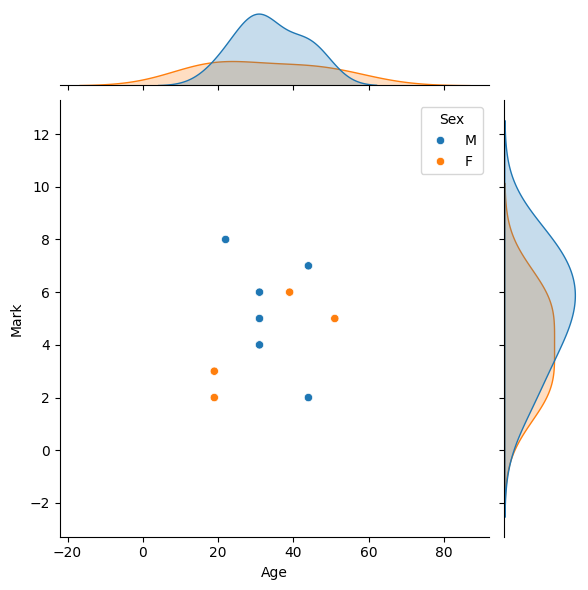

In [50]:
sns.jointplot(x='Age',y='Mark',hue='Sex',kind='scatter',data=tabla4)

- Dadas dos Series de Pandas, implementar una función 'find_not_common' para encontrar los elementos no comunes a ambas Series
- Se proveen dos series como referencia, el resultado para este ejemplo debe ser una serie con los elementos [4, 6, 14, 16]

In [66]:
def find_not_common(a,b):
    not_common=[]
    array=np.array(p1)
    array2=np.array(p2)
    for i in array:
        if i not in array2:
            not_common.append(i)
    for t in array2:
        if t not in array:
            not_common.append(t)
    return (pd.Series(not_common))



In [57]:
p1 = pd.Series([2, 4, 12, 6, 8, 10])
p2 = pd.Series([8, 10, 12, 10, 14, 2, 16, 10])

print(find_not_common(p1, p2).equals(pd.Series([4, 6, 14, 16]))) # Esto deberia imprimir True

True
